# Required Packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import itertools
import pickle

In [2]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models import Word2Vec

# Load TRUE dataset:

In [4]:
true = pd.read_csv('True.csv')
true.shape

(21417, 4)

# Load FAKE dataset:

In [5]:
fake = pd.read_csv('Fake.csv')
fake.shape

C:\Users\capta\AppData\Local\Temp\ipykernel_15004\473971886.py:1: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  fake = pd.read_csv('Fake.csv')


(23502, 172)

In [6]:
# Add labels
true['label'] = 1
fake['label'] = 0

In [7]:
# Concatenate dataframes
frames = [true.loc[:5000][:], fake.loc[:5000][:]]
df = pd.concat(frames)
df.shape

(10002, 173)

# Data Preprocessing:

In [8]:
X = df.drop('label', axis=1)
y = df['label']

In [9]:
df.shape

(10002, 173)

In [10]:
df.head(2)

,title,text,subject,date,label,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.tail(2)

,title,text,subject,date,label,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171
4999,CNN Panelist LAUGHS In Corey Lewandowski’s Fa...,As Donald Trump s campaign continues to sink d...,News,"August 18, 2016",0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5000,Trump Supporter Who Wants To Shoot Black Kids...,"Hi folks, John Harper here, at least if you as...",News,"August 18, 2016",0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Create a corpus of text
corpus = df['text'].values

In [13]:
# Define a function to clean the text
def clean_text(text):
    # Remove punctuation and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Remove stopwords and stem the words
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text.split() if word not in stopwords.words('english')]

    # Join the words back into a string
    text = ' '.join(text)

    return text.split()

In [14]:
# Apply the clean_text function to the corpus
corpus = [clean_text(doc) for doc in corpus]

In [15]:
# Inspect Corpus: Print a few documents
for i in range(5):
    print(f"Document {i+1}: {corpus[i]}")

Document 1: ['washington', 'reuter', 'head', 'conserv', 'republican', 'faction', 'u', 'congress', 'vote', 'month', 'huge', 'expans', 'nation', 'debt', 'pay', 'tax', 'cut', 'call', 'fiscal', 'conserv', 'sunday', 'urg', 'budget', 'restraint', 'keep', 'sharp', 'pivot', 'way', 'among', 'republican', 'u', 'repres', 'mark', 'meadow', 'speak', 'cb', 'face', 'nation', 'drew', 'hard', 'line', 'feder', 'spend', 'lawmak', 'brace', 'battl', 'januari', 'return', 'holiday', 'wednesday', 'lawmak', 'begin', 'tri', 'pass', 'feder', 'budget', 'fight', 'like', 'link', 'issu', 'immigr', 'polici', 'even', 'novemb', 'congression', 'elect', 'campaign', 'approach', 'republican', 'seek', 'keep', 'control', 'congress', 'presid', 'donald', 'trump', 'republican', 'want', 'big', 'budget', 'increas', 'militari', 'spend', 'democrat', 'also', 'want', 'proport', 'increas', 'non', 'defens', 'discretionari', 'spend', 'program', 'support', 'educ', 'scientif', 'research', 'infrastructur', 'public', 'health', 'environment'

In [16]:
# Join the tokenized words back into strings
corpus = [' '.join(doc) for doc in corpus]

In [17]:
# Step 1: TF-IDF vectorization
# Initialize the vectorizer
vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.7)

In [18]:
# Fit and transform the corpus
tfidf_matrix = vectorizer.fit_transform(corpus)

In [19]:
# Get the feature names
feature_names = vectorizer.get_feature_names_out()

In [20]:
# Save the vectorizer using pickle
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))

In [21]:
# Step 2: Topic modeling
# Initialize the LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=0)

In [22]:
# Fit and transform the TF-IDF matrix
lda_matrix = lda.fit_transform(tfidf_matrix)

In [23]:
# Get the topic distribution for each document
topic_dist = lda_matrix.argmax(axis=1)

In [24]:
# Get the top words for each topic
top_words = {}
for i, topic in enumerate(lda.components_):
    top_words[i] = [feature_names[i] for i in topic.argsort()[-10:]]

In [25]:
# Save the LDA model using pickle
pickle.dump(lda, open('lda.pkl', 'wb'))

In [41]:
# Step 3: Word embeddings using Word2Vec
# Train a Word2Vec model on the corpus
model = Word2Vec(corpus, vector_size=100, window=5, min_count=2, workers=4)
model.save("word2vec.model")

In [42]:
# Create a vocabulary of words and their vectors
vocab = model.wv

In [43]:
print("Word2Vec vector size:", model.vector_size)

Word2Vec vector size: 100


In [59]:
# Define a function to create document vectors
def document_vector(doc, vocab):
    # Creating an empty array for the document vector
    # Assuming Word2Vec vectors have a size of 100
    doc_vec = np.zeros(100)  

    # Count the number of words in the document
    num_words = 0

    for word in doc:
        if word in vocab:
            doc_vec += vocab[word]
            num_words += 1

    if num_words > 0:
        doc_vec /= num_words

    return doc_vec

# Create document vectors for each document in the corpus
X = [document_vector(doc, vocab) for doc in corpus]
X = np.array(X)
y = df['label']

In [60]:
# Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [61]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (8001, 100)
X_test shape: (2001, 100)


# Model building - Passive Aggresive Classifier:

In [62]:
classifier = PassiveAggressiveClassifier(max_iter=1000, random_state=0, C=1.0)
classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

In [63]:
# Save the classifier using pickle
pickle.dump(classifier, open('classifier.pkl', 'wb'))

# Performance Metrics:

In [64]:
accuracy = accuracy_score(y_test, pred) * 100
precision = precision_score(y_test, pred) * 100
recall = recall_score(y_test, pred) * 100
f1 = f1_score(y_test, pred) * 100
roc_auc = roc_auc_score(y_test, pred)

print("Accuracy: %0.3f" % accuracy)
print("Precision: %0.3f" % precision)
print("Recall: %0.3f" % recall)
print("F1 Score: %0.3f" % f1)
print("ROC AUC Score: %0.3f" % roc_auc)

Accuracy: 73.213
Precision: 65.313
Recall: 96.738
F1 Score: 77.979
ROC AUC Score: 0.737


# Confusion Matrix Plot:

Confusion Matrix without Normalization


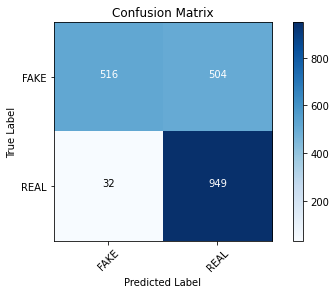

In [65]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix without Normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [66]:
# Load model and vectorizer to predict the previous datapoint
loaded_model = pickle.load(open('classifier.pkl', 'rb'))
loaded_vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))

ps = PorterStemmer()

# Preprocess the previous datapoint
review = re.sub('[^a-zA-Z]', ' ', fake['text'][13070])
review = review.lower()
review = review.split()
    
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)

In [68]:
print("Number of features in the loaded vectorizer:", loaded_vectorizer.get_feature_names_out().shape[0])

Number of features in the loaded vectorizer: 11564


In [70]:
# Transform the preprocessed datapoint using the loaded vectorizer
val = document_vector(review, vocab)

In [71]:
# Predict the label of the preprocessed datapoint using the loaded model
prediction = loaded_model.predict([val])
print("Prediction: ", prediction)

Prediction:  [0]
